In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
df = pd.DataFrame()
url = "https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW"
result = requests.get(url)
doc = BeautifulSoup(result.text, "html.parser")
movie_table = doc.find_all("table")

movie_data = []
for row in movie_table[0].find_all("tr")[1:]:  # Skip the header row
    cells = row.find_all("td")
    current_title = cells[1].text
    current_gross = cells[2].text[1:]
    current_year = cells[3].text
    
    
    movie_data.append({"Title" : current_title,
                       "Lifetime Gross" : current_gross,
                       "Year" : current_year,
                      }
                     )
                       
temp = pd.DataFrame(movie_data)
df = pd.concat([temp, df])

for i in range(200,1000,200):
    url = "https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW&offset="+str(i)
    result = requests.get(url)
    doc = BeautifulSoup(result.text, "html.parser")
    movie_table = doc.find_all("table")
    movie_data = []
    for row in movie_table[0].find_all("tr")[1:]:  # Skip the header row
        cells = row.find_all("td")
        current_title = cells[1].text
        current_gross = cells[2].text[1:]
        current_year = cells[3].text


        movie_data.append({"Title" : current_title,
                           "Lifetime Gross" : current_gross,
                           "Year" : current_year,
                          }
                         )

    temp = pd.DataFrame(movie_data, index = [i for i in range(i,i+200,1)])
    df = pd.concat([temp, df])
    
revenue_data = df

### Import Kaggle Datasets

In [4]:
import opendatasets as od
import os
movie_industry = "https://www.kaggle.com/datasets/danielgrijalvas/movies/data"
imdb2000 = "https://www.kaggle.com/datasets/thegoanpanda/imdb-top-2000-movies"

od.download(movie_industry)
od.download(imdb2000)

Skipping, found downloaded files in ".\movies" (use force=True to force download)
Skipping, found downloaded files in ".\imdb-top-2000-movies" (use force=True to force download)


In [5]:
'''
movies = './movies'
imdb = './imdb-top-2000-movies'
os.listdir(movies)
os.listdir(imdb)
'''

movies = './movies'
imdb = './imdb-top-2000-movies'


In [6]:

#movie_industry = pd.read_csv('movies.csv')
#imdb2000 = pd.read_csv(r"C:\Users\coolt\Desktop\IMDb Top 2000 Movies.csv", encoding_errors ='replace')


movie_industry = pd.read_csv(os.path.join(movies, 'movies.csv'))
imdb2000 = pd.read_csv(os.path.join(imdb, 'IMDb Top 2000 Movies.csv'), encoding_errors = 'replace')

In [7]:
movie_industry["Title"] = movie_industry["name"]
movie_industry = movie_industry.drop(["name", "year"], axis = 1)
movie_industry.head()

,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Title
0,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,The Shining
1,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,The Blue Lagoon
2,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Star Wars: Episode V - The Empire Strikes Back
3,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,Airplane!
4,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,Caddyshack


In [8]:
print(len(movie_industry))

7668


In [9]:
imdb2000["Title"] = imdb2000["Movie Name"]
imdb2000 = imdb2000.drop(["Movie Name", "Movie Rank", "Year of Release"], axis = 1)
imdb2000.head()

,IMDB Rating,Title
0,9.2,The Godfather
1,8.1,T�ky� monogatari
2,8.6,Shichinin no samurai
3,9.0,The Godfather Part II
4,8.5,Casablanca


In [10]:
print(len(imdb2000))

2000


In [11]:
kaggle_data = pd.merge(movie_industry, imdb2000, how = "outer", on = "Title")

In [12]:
df = pd.merge(revenue_data, kaggle_data, how = "inner", on = "Title")

In [13]:
movie_industry["Title"].unique()

array(['The Shining', 'The Blue Lagoon',
       'Star Wars: Episode V - The Empire Strikes Back', ...,
       'Saving Mbango', "It's Just Us", 'Tee em el'], dtype=object)

In [14]:
revenue_data[revenue_data["Title"] == "The Shining"]

,Title,Lifetime Gross,Year


### Data Cleaning

In [15]:
df

,Title,Lifetime Gross,Year,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,IMDB Rating
0,Captain Phillips,"218,791,811",2013,PG-13,Adventure,"October 11, 2013 (United States)",7.8,432000.0,Paul Greengrass,Billy Ray,Tom Hanks,United States,55000000.0,218791811.0,Scott Rudin Productions,134.0,7.8
1,The Prince of Egypt,"218,613,188",1998,PG,Animation,"December 18, 1998 (United States)",7.1,122000.0,Brenda Chapman,Philip LaZebnik,Val Kilmer,United States,70000000.0,218613188.0,DreamWorks Animation,99.0,NaN
2,Jack Reacher,"218,340,595",2012,PG-13,Action,"December 21, 2012 (United States)",7.0,317000.0,Christopher McQuarrie,Lee Child,Tom Cruise,United States,60000000.0,218340595.0,Paramount Pictures,130.0,NaN
3,Kingdom of Heaven,"218,237,071",2005,R,Action,"May 6, 2005 (United States)",7.2,272000.0,Ridley Scott,William Monahan,Orlando Bloom,United Kingdom,130000000.0,218122627.0,Twentieth Century Fox,144.0,NaN
4,Smallfoot,"218,015,531",2018,PG,Animation,"September 28, 2018 (United States)",6.6,36000.0,Karey Kirkpatrick,Karey Kirkpatrick,Channing Tatum,United States,80000000.0,214040103.0,Warner Animation Group,96.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,Night at the Museum,"574,482,479",2006,PG,Adventure,"December 22, 2006 (United States)",6.4,323000.0,Shawn Levy,Robert Ben Garant,Ben Stiller,United States,110000000.0,574481229.0,Twentieth Century Fox,108.0,NaN
1051,Fifty Shades of Grey,"569,651,467",2015,R,Drama,"February 13, 2015 (United States)",4.1,304000.0,Sam Taylor-Johnson,Kelly Marcel,Dakota Johnson,United States,40000000.0,569651467.0,Focus Features,125.0,NaN
1052,The Little Mermaid,"569,626,289",2023,G,Animation,"November 17, 1989 (United States)",7.6,244000.0,Ron Clements,John Musker,Jodi Benson,United States,40000000.0,211343479.0,Walt Disney Pictures,83.0,7.6
1053,The Little Mermaid,"569,626,289",2023,PG,Adventure,"August 17, 2018 (United States)",4.3,8500.0,Blake Harris,Blake Harris,William Moseley,United States,NaN,2614006.0,Conglomerate Media,85.0,7.6


In [16]:
#check how many unique movies there are
len(df["Title"].unique())

838

In [17]:
#remove duplicate movies
unique_titles_df = df.drop_duplicates(subset="Title", keep="first")
unique_titles_df

,Title,Lifetime Gross,Year,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,IMDB Rating
0,Captain Phillips,"218,791,811",2013,PG-13,Adventure,"October 11, 2013 (United States)",7.8,432000.0,Paul Greengrass,Billy Ray,Tom Hanks,United States,55000000.0,218791811.0,Scott Rudin Productions,134.0,7.8
1,The Prince of Egypt,"218,613,188",1998,PG,Animation,"December 18, 1998 (United States)",7.1,122000.0,Brenda Chapman,Philip LaZebnik,Val Kilmer,United States,70000000.0,218613188.0,DreamWorks Animation,99.0,NaN
2,Jack Reacher,"218,340,595",2012,PG-13,Action,"December 21, 2012 (United States)",7.0,317000.0,Christopher McQuarrie,Lee Child,Tom Cruise,United States,60000000.0,218340595.0,Paramount Pictures,130.0,NaN
3,Kingdom of Heaven,"218,237,071",2005,R,Action,"May 6, 2005 (United States)",7.2,272000.0,Ridley Scott,William Monahan,Orlando Bloom,United Kingdom,130000000.0,218122627.0,Twentieth Century Fox,144.0,NaN
4,Smallfoot,"218,015,531",2018,PG,Animation,"September 28, 2018 (United States)",6.6,36000.0,Karey Kirkpatrick,Karey Kirkpatrick,Channing Tatum,United States,80000000.0,214040103.0,Warner Animation Group,96.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,I Am Legend,"585,410,052",2007,PG-13,Action,"December 14, 2007 (United States)",7.2,704000.0,Francis Lawrence,Mark Protosevich,Will Smith,United States,150000000.0,585410052.0,Warner Bros.,101.0,NaN
1040,"Monsters, Inc.","579,723,768",2001,G,Animation,"November 2, 2001 (United States)",8.1,838000.0,Pete Docter,Pete Docter,Billy Crystal,United States,115000000.0,579707738.0,Pixar Animation Studios,92.0,8.1
1050,Night at the Museum,"574,482,479",2006,PG,Adventure,"December 22, 2006 (United States)",6.4,323000.0,Shawn Levy,Robert Ben Garant,Ben Stiller,United States,110000000.0,574481229.0,Twentieth Century Fox,108.0,NaN
1051,Fifty Shades of Grey,"569,651,467",2015,R,Drama,"February 13, 2015 (United States)",4.1,304000.0,Sam Taylor-Johnson,Kelly Marcel,Dakota Johnson,United States,40000000.0,569651467.0,Focus Features,125.0,NaN


In [18]:
#Lifetime Gross should be float for data analysis
print(unique_titles_df.dtypes)

Title              object
Lifetime Gross     object
Year               object
rating             object
genre              object
released           object
score             float64
votes             float64
director           object
writer             object
star               object
country            object
budget            float64
gross             float64
company            object
runtime           float64
IMDB Rating       float64
dtype: object


In [19]:
#removing commas from Lifetime Gross
unique_titles_df['Lifetime Gross'] = unique_titles_df['Lifetime Gross'].str.replace(',', '')
unique_titles_df.head()

,Title,Lifetime Gross,Year,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,IMDB Rating
0,Captain Phillips,218791811,2013,PG-13,Adventure,"October 11, 2013 (United States)",7.8,432000.0,Paul Greengrass,Billy Ray,Tom Hanks,United States,55000000.0,218791811.0,Scott Rudin Productions,134.0,7.8
1,The Prince of Egypt,218613188,1998,PG,Animation,"December 18, 1998 (United States)",7.1,122000.0,Brenda Chapman,Philip LaZebnik,Val Kilmer,United States,70000000.0,218613188.0,DreamWorks Animation,99.0,NaN
2,Jack Reacher,218340595,2012,PG-13,Action,"December 21, 2012 (United States)",7.0,317000.0,Christopher McQuarrie,Lee Child,Tom Cruise,United States,60000000.0,218340595.0,Paramount Pictures,130.0,NaN
3,Kingdom of Heaven,218237071,2005,R,Action,"May 6, 2005 (United States)",7.2,272000.0,Ridley Scott,William Monahan,Orlando Bloom,United Kingdom,130000000.0,218122627.0,Twentieth Century Fox,144.0,NaN
4,Smallfoot,218015531,2018,PG,Animation,"September 28, 2018 (United States)",6.6,36000.0,Karey Kirkpatrick,Karey Kirkpatrick,Channing Tatum,United States,80000000.0,214040103.0,Warner Animation Group,96.0,NaN


In [20]:
#converting lifetime gross, year into float
unique_titles_df['Lifetime Gross'] = unique_titles_df['Lifetime Gross'].astype(float)
unique_titles_df['Year'] = unique_titles_df['Year'].astype(float)
print(unique_titles_df.dtypes)

Title              object
Lifetime Gross    float64
Year              float64
rating             object
genre              object
released           object
score             float64
votes             float64
director           object
writer             object
star               object
country            object
budget            float64
gross             float64
company            object
runtime           float64
IMDB Rating       float64
dtype: object


In [21]:
#check for null values
print(unique_titles_df.isnull().sum())

Title               0
Lifetime Gross      0
Year                0
rating              9
genre               7
released            7
score               7
votes               7
director            7
writer              7
star                7
country             7
budget             23
gross               8
company             7
runtime             7
IMDB Rating       745
dtype: int64


In [22]:
# replace them with appropriate substitutions
unique_titles_df[['rating', 'genre', 'director', 'writer', 'star', 'country', 'company']] = unique_titles_df[['rating', 'genre', 'director', 'writer', 'star', 'country', 'company']].fillna('Unknown')
unique_titles_df[['score', 'votes', 'budget', 'gross', 'runtime', 'IMDB Rating']] = unique_titles_df[['score', 'votes', 'budget', 'gross', 'runtime', 'IMDB Rating']].fillna(0.0)

print(unique_titles_df.isnull().sum())

Title             0
Lifetime Gross    0
Year              0
rating            0
genre             0
released          7
score             0
votes             0
director          0
writer            0
star              0
country           0
budget            0
gross             0
company           0
runtime           0
IMDB Rating       0
dtype: int64


In [23]:
#extract the month from 'released' column and remove null values
unique_titles_df['released']  = unique_titles_df['released'].str.replace(',', '')
unique_titles_df['Date'] = unique_titles_df['released'].str.split('(').str.get(0).str.strip()
unique_titles_df['Date'] = pd.to_datetime(unique_titles_df['Date'])
unique_titles_df['Month'] = unique_titles_df['Date'].dt.month
unique_titles_df['Month'] = unique_titles_df['Month'].fillna(0.0)
unique_titles_df = unique_titles_df.drop(columns=['released', 'Date'])
unique_titles_df

,Title,Lifetime Gross,Year,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,IMDB Rating,Month
0,Captain Phillips,218791811.0,2013.0,PG-13,Adventure,7.8,432000.0,Paul Greengrass,Billy Ray,Tom Hanks,United States,55000000.0,218791811.0,Scott Rudin Productions,134.0,7.8,10.0
1,The Prince of Egypt,218613188.0,1998.0,PG,Animation,7.1,122000.0,Brenda Chapman,Philip LaZebnik,Val Kilmer,United States,70000000.0,218613188.0,DreamWorks Animation,99.0,0.0,12.0
2,Jack Reacher,218340595.0,2012.0,PG-13,Action,7.0,317000.0,Christopher McQuarrie,Lee Child,Tom Cruise,United States,60000000.0,218340595.0,Paramount Pictures,130.0,0.0,12.0
3,Kingdom of Heaven,218237071.0,2005.0,R,Action,7.2,272000.0,Ridley Scott,William Monahan,Orlando Bloom,United Kingdom,130000000.0,218122627.0,Twentieth Century Fox,144.0,0.0,5.0
4,Smallfoot,218015531.0,2018.0,PG,Animation,6.6,36000.0,Karey Kirkpatrick,Karey Kirkpatrick,Channing Tatum,United States,80000000.0,214040103.0,Warner Animation Group,96.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,I Am Legend,585410052.0,2007.0,PG-13,Action,7.2,704000.0,Francis Lawrence,Mark Protosevich,Will Smith,United States,150000000.0,585410052.0,Warner Bros.,101.0,0.0,12.0
1040,"Monsters, Inc.",579723768.0,2001.0,G,Animation,8.1,838000.0,Pete Docter,Pete Docter,Billy Crystal,United States,115000000.0,579707738.0,Pixar Animation Studios,92.0,8.1,11.0
1050,Night at the Museum,574482479.0,2006.0,PG,Adventure,6.4,323000.0,Shawn Levy,Robert Ben Garant,Ben Stiller,United States,110000000.0,574481229.0,Twentieth Century Fox,108.0,0.0,12.0
1051,Fifty Shades of Grey,569651467.0,2015.0,R,Drama,4.1,304000.0,Sam Taylor-Johnson,Kelly Marcel,Dakota Johnson,United States,40000000.0,569651467.0,Focus Features,125.0,0.0,2.0


In [24]:
print(unique_titles_df.isnull().sum())

Title             0
Lifetime Gross    0
Year              0
rating            0
genre             0
score             0
votes             0
director          0
writer            0
star              0
country           0
budget            0
gross             0
company           0
runtime           0
IMDB Rating       0
Month             0
dtype: int64


### Exploratory Data Analysis

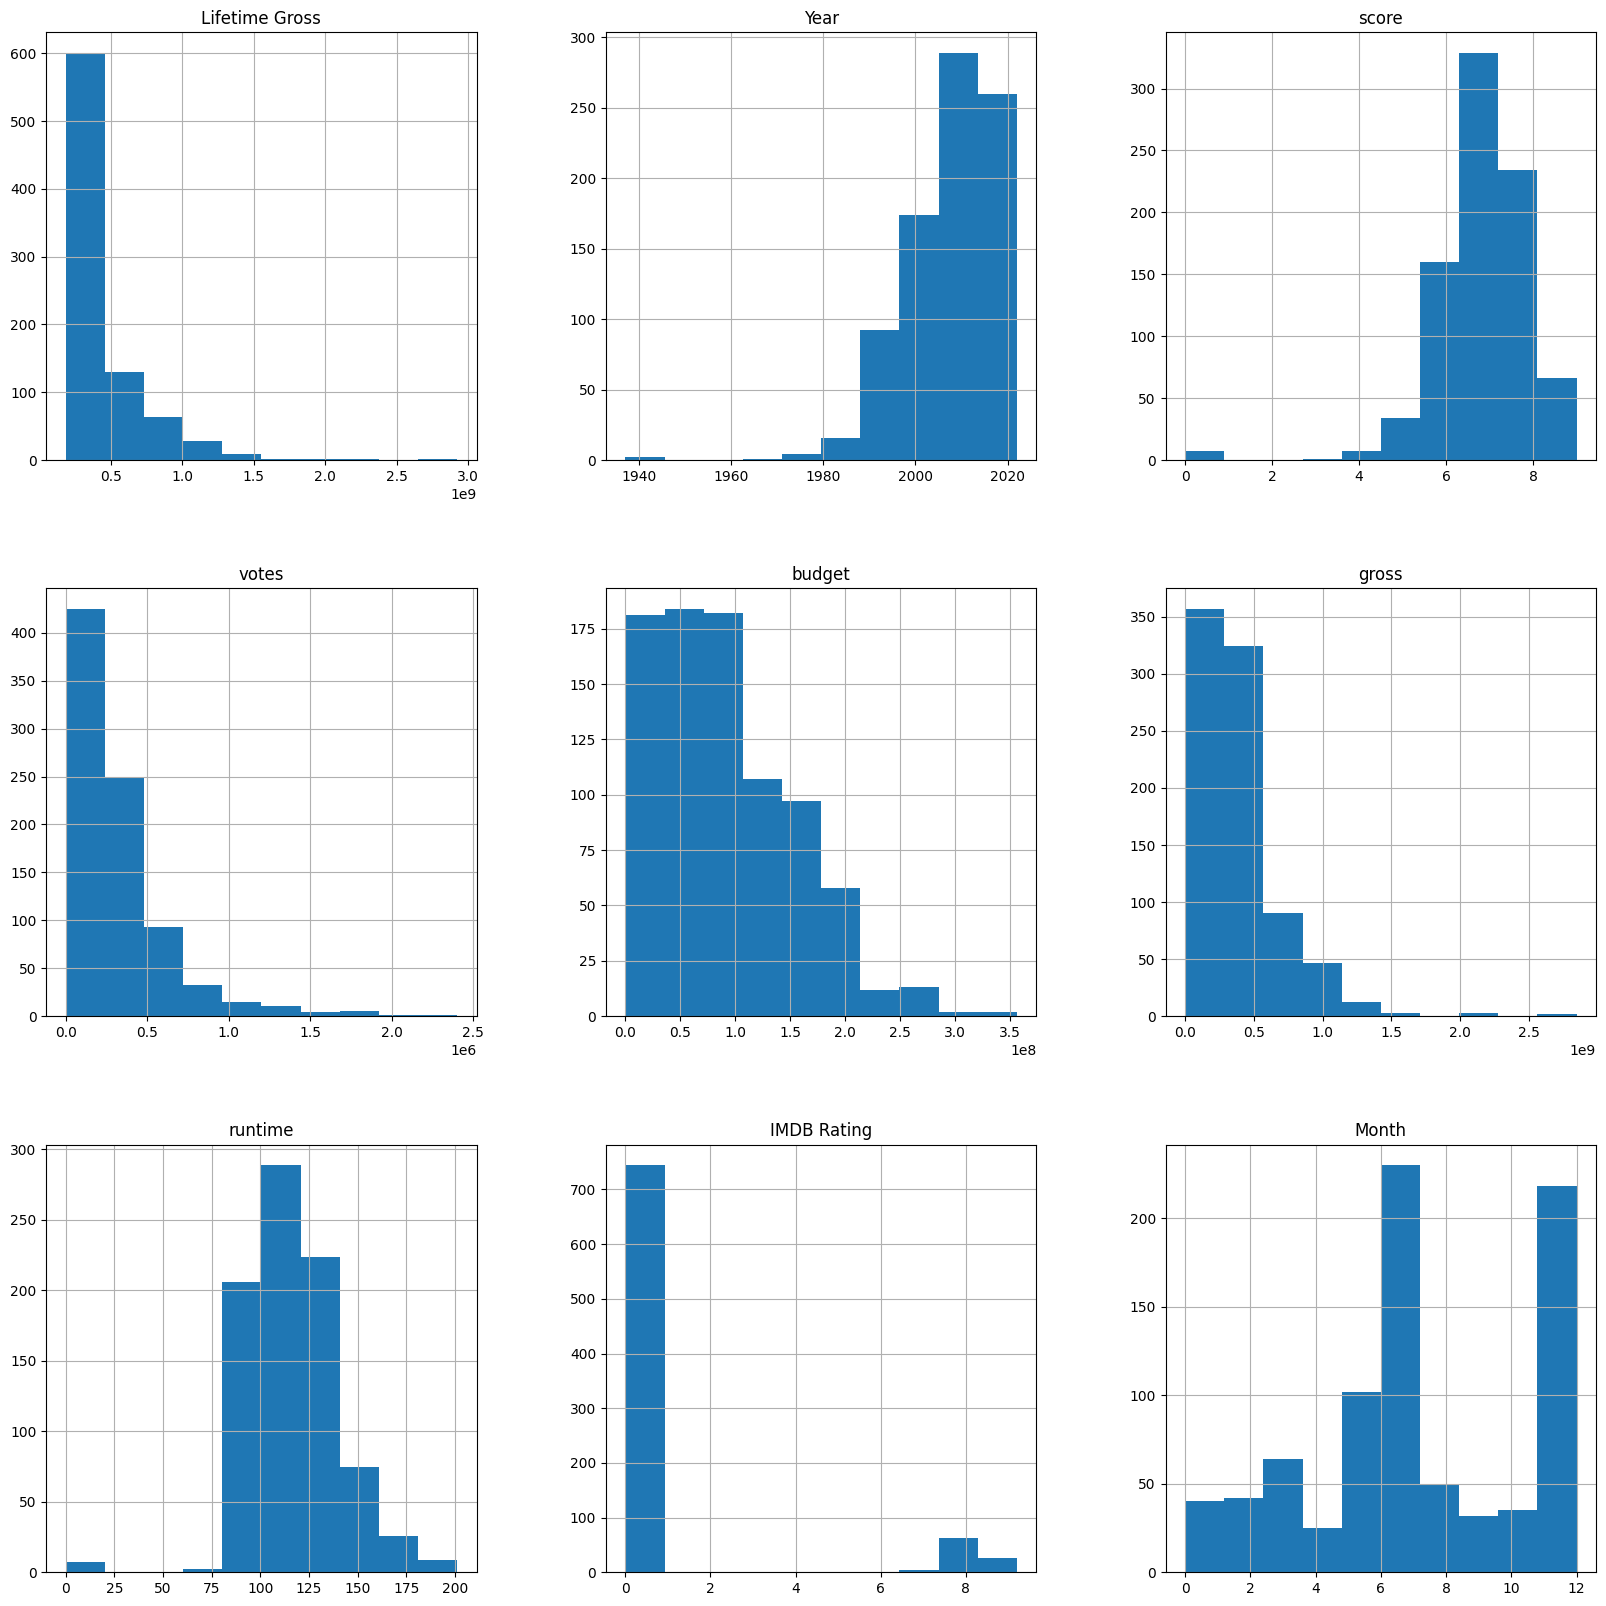

In [25]:
p=unique_titles_df.hist(figsize=(20,20))

### NN

# - Need to Do:
- Fix Data Standardization for categorical variables - Year, Rating, Genre, Writer, Star, Country, Month
  - StandardScalar may be appropiate for score and budget columns

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
import matplotlib.pyplot as plt

In [27]:
unique_titles_df

,Title,Lifetime Gross,Year,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,IMDB Rating,Month
0,Captain Phillips,218791811.0,2013.0,PG-13,Adventure,7.8,432000.0,Paul Greengrass,Billy Ray,Tom Hanks,United States,55000000.0,218791811.0,Scott Rudin Productions,134.0,7.8,10.0
1,The Prince of Egypt,218613188.0,1998.0,PG,Animation,7.1,122000.0,Brenda Chapman,Philip LaZebnik,Val Kilmer,United States,70000000.0,218613188.0,DreamWorks Animation,99.0,0.0,12.0
2,Jack Reacher,218340595.0,2012.0,PG-13,Action,7.0,317000.0,Christopher McQuarrie,Lee Child,Tom Cruise,United States,60000000.0,218340595.0,Paramount Pictures,130.0,0.0,12.0
3,Kingdom of Heaven,218237071.0,2005.0,R,Action,7.2,272000.0,Ridley Scott,William Monahan,Orlando Bloom,United Kingdom,130000000.0,218122627.0,Twentieth Century Fox,144.0,0.0,5.0
4,Smallfoot,218015531.0,2018.0,PG,Animation,6.6,36000.0,Karey Kirkpatrick,Karey Kirkpatrick,Channing Tatum,United States,80000000.0,214040103.0,Warner Animation Group,96.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,I Am Legend,585410052.0,2007.0,PG-13,Action,7.2,704000.0,Francis Lawrence,Mark Protosevich,Will Smith,United States,150000000.0,585410052.0,Warner Bros.,101.0,0.0,12.0
1040,"Monsters, Inc.",579723768.0,2001.0,G,Animation,8.1,838000.0,Pete Docter,Pete Docter,Billy Crystal,United States,115000000.0,579707738.0,Pixar Animation Studios,92.0,8.1,11.0
1050,Night at the Museum,574482479.0,2006.0,PG,Adventure,6.4,323000.0,Shawn Levy,Robert Ben Garant,Ben Stiller,United States,110000000.0,574481229.0,Twentieth Century Fox,108.0,0.0,12.0
1051,Fifty Shades of Grey,569651467.0,2015.0,R,Drama,4.1,304000.0,Sam Taylor-Johnson,Kelly Marcel,Dakota Johnson,United States,40000000.0,569651467.0,Focus Features,125.0,0.0,2.0


In [28]:
df2 = unique_titles_df.drop(["gross", "Title", "IMDB Rating", "Year"], axis = 1)

In [29]:
df2 = df2.dropna()

In [30]:
le = LabelEncoder()
string_cat = ["genre", "rating", "director", "writer", "star", "company", "country"]
for cat in string_cat:
    df2[cat] = le.fit_transform(df2[cat]) 	

In [31]:
df2

,Lifetime Gross,rating,genre,score,votes,director,writer,star,country,budget,company,runtime,Month
0,218791811.0,3,1,7.8,432000.0,283,44,351,18,55000000.0,145,134.0,10.0
1,218613188.0,2,2,7.1,122000.0,44,425,363,18,70000000.0,65,99.0,12.0
2,218340595.0,3,0,7.0,317000.0,64,316,350,18,60000000.0,126,130.0,12.0
3,218237071.0,4,0,7.2,272000.0,324,555,274,17,130000000.0,164,144.0,5.0
4,218015531.0,2,2,6.6,36000.0,207,299,58,18,80000000.0,173,96.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,585410052.0,3,0,7.2,704000.0,121,344,371,18,150000000.0,174,101.0,12.0
1040,579723768.0,0,2,8.1,838000.0,290,411,42,18,115000000.0,131,92.0,11.0
1050,574482479.0,2,1,6.4,323000.0,365,444,35,18,110000000.0,164,108.0,12.0
1051,569651467.0,4,6,4.1,304000.0,357,305,78,18,40000000.0,74,125.0,2.0


In [32]:
X = df2.drop("Lifetime Gross", axis = 1)

In [33]:
y = df2["Lifetime Gross"]

In [34]:
X

,rating,genre,score,votes,director,writer,star,country,budget,company,runtime,Month
0,3,1,7.8,432000.0,283,44,351,18,55000000.0,145,134.0,10.0
1,2,2,7.1,122000.0,44,425,363,18,70000000.0,65,99.0,12.0
2,3,0,7.0,317000.0,64,316,350,18,60000000.0,126,130.0,12.0
3,4,0,7.2,272000.0,324,555,274,17,130000000.0,164,144.0,5.0
4,2,2,6.6,36000.0,207,299,58,18,80000000.0,173,96.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,3,0,7.2,704000.0,121,344,371,18,150000000.0,174,101.0,12.0
1040,0,2,8.1,838000.0,290,411,42,18,115000000.0,131,92.0,11.0
1050,2,1,6.4,323000.0,365,444,35,18,110000000.0,164,108.0,12.0
1051,4,6,4.1,304000.0,357,305,78,18,40000000.0,74,125.0,2.0


In [35]:
scalar = StandardScaler()
X_standard = scalar.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.2)

In [37]:
X_train.shape

(670, 12)

In [38]:
FNN_model = tf.keras.models.Sequential([
    layers.Dense(20, input_shape = (12,), activation='relu', kernel_initializer='he_normal'),
    layers.Dense(10, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(10, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(1)
],
    name = "FNN_Model",
    )
FNN_model.summary()

Model: "FNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                260       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


In [39]:
adam = keras.optimizers.Adam(
    learning_rate=0.05,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    name="adam",
)


In [40]:
loss_fn = tf.keras.losses.MeanAbsolutePercentageError()

In [41]:
mape = keras.metrics.MeanAbsolutePercentageError()

In [42]:
FNN_model.compile(optimizer = adam,        # one sgd algorithm
              loss = loss_fn,            # loss function 
              metrics = [mape])    # 'accurancy' for classification and 'mse' for regression

In [43]:
FNN_model.reset_states()
history = FNN_model.fit(X_train, y_train, 
                        epochs = 20, verbose=1, 
                        batch_size = 8,
                        validation_data=(X_test, y_test))

Epoch 1/20
84/84 [==============================] - 4s 9ms/step - loss: 99.9979 - mean_absolute_percentage_error: 99.9979 - val_loss: 99.9729 - val_mean_absolute_percentage_error: 99.9729
Epoch 2/20
84/84 [==============================] - 1s 6ms/step - loss: 98.2815 - mean_absolute_percentage_error: 98.2815 - val_loss: 93.0380 - val_mean_absolute_percentage_error: 93.0380
Epoch 3/20
84/84 [==============================] - 0s 5ms/step - loss: 72.5860 - mean_absolute_percentage_error: 72.5860 - val_loss: 61.2590 - val_mean_absolute_percentage_error: 61.2590
Epoch 4/20
84/84 [==============================] - 0s 5ms/step - loss: 52.3639 - mean_absolute_percentage_error: 52.3639 - val_loss: 50.3910 - val_mean_absolute_percentage_error: 50.3910
Epoch 5/20
84/84 [==============================] - 0s 5ms/step - loss: 41.6432 - mean_absolute_percentage_error: 41.6432 - val_loss: 40.6265 - val_mean_absolute_percentage_error: 40.6265
Epoch 6/20
84/84 [==============================] - 0s 5ms/s

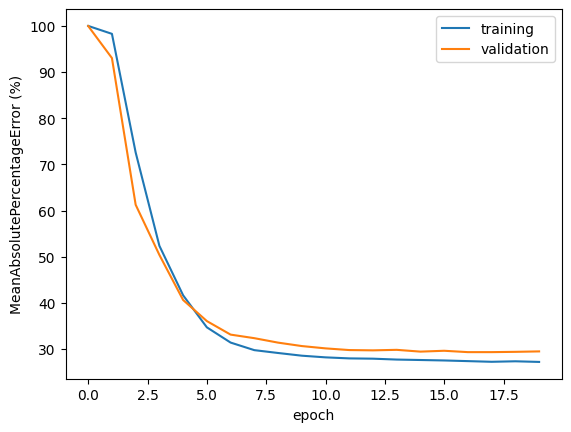

In [44]:
plt.plot(history.history["loss"], label = "training")
plt.plot(history.history["val_loss"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "MeanAbsolutePercentageError (%)")
plt.legend()

In [45]:
FNN_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 29.4960 - mean_absolute_percentage_error: 29.4960


[29.495975494384766, 29.495975494384766]